# data import

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as math
import scikitplot as skplt
from ipywidgets import interact, interactive, fixed, interact_manual

sns.set(style="white", palette="pastel",font_scale=1.5, rc={"lines.linewidth": 2.5,'figure.figsize':(11.7,8.27)})
pd.options.display.max_columns = None

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

## combined test data

In [4]:
df_combined = pd.read_csv("data/exported/df_combined.csv", index_col = 0)
df_not_combined = pd.read_csv("data/exported/df_not_combined.csv", index_col = 0)
df_yeast_not_combined = pd.read_csv("data/exported/df_yeast_not_combined.csv", index_col = 0)
df_yeast_combined = pd.read_csv("data/exported/df_yeast_combined.csv", index_col = 0)

In [5]:
df_not_combined = df_not_combined.astype({"base_1":"category","base_2":"category","base_3":"category",\
                                          "base_4":"category","base_5":"category","modified_status":"category"})
df_not_combined = df_not_combined.astype({"ref_number":"object"})

In [6]:
df_combined = df_combined.astype({"base_1":"category","base_2":"category","base_3":"category",\
                                          "base_4":"category","base_5":"category","modified_status":"category",
                                  "modified_status_rolling_max":"object"})
df_combined = df_combined.astype({"ref_number":"object"})

In [7]:
df_yeast_not_combined = df_yeast_not_combined.astype({"base_1":"category","base_2":"category","base_3":"category",\
                                          "base_4":"category","base_5":"category"})
df_yeast_not_combined = df_yeast_not_combined.astype({"ref_number":"object"})

In [8]:
df_yeast_combined = df_yeast_combined.astype({"base_1":"category","base_2":"category","base_3":"category",\
                                          "base_4":"category","base_5":"category"})
df_yeast_combined = df_yeast_combined.astype({"ref_number":"object"})

In [9]:
df_combined["modified"] = df_combined.modified_status.astype(int) + df_combined.modified_status_rolling_max
label_dict = {2.0:"Modified",1.0:"Modified Neighbour",0.0:"Unmodified"}
label_enc = [label_dict[elm] for elm in df_combined.modified.values]
df_combined["modified"] = label_enc

## yeast data

In [60]:

df_yeast_combined_predicted = pd.read_csv("data/exported/df_yeast_combined_predicted.csv", index_col = 0)
df_yeast_combined_predicted.rename(columns = {"dwell_time":"dwell_time_median", "median_value":"median_value_median"}, inplace=True)

# limitation preprocessor combined

In [10]:
imputer1_combined = SimpleImputer(strategy="median")
scaler1_combined = StandardScaler()
numeric_transformer_combined = make_pipeline(imputer1_combined,scaler1_combined)


imputer2_combined = SimpleImputer(strategy='constant', fill_value='missing')
encoder_combined = OneHotEncoder(handle_unknown='error')
cat_transformer_combined = make_pipeline(imputer2_combined,encoder_combined)

In [11]:
numeric_features_combined_limited = ["dwell_time_median","dwell_time_rolling_min","dwell_time_diff_to_median"]

#preprocessing pipeline to scale numeric and onehot encode categorical values


preprocessor_combined_limited = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_combined, numeric_features_combined_limited)
    ])

# umap

In [12]:
import umap
umap = umap.UMAP()

In [13]:
embedding = umap.fit_transform(preprocessor_combined_limited.fit_transform(df_combined))

umap_df = pd.DataFrame(embedding)
umap_df["modified"] = df_combined.modified.astype("category")
umap_df.columns = ["umap_dim_1","umap_dim_2","modified_status"]

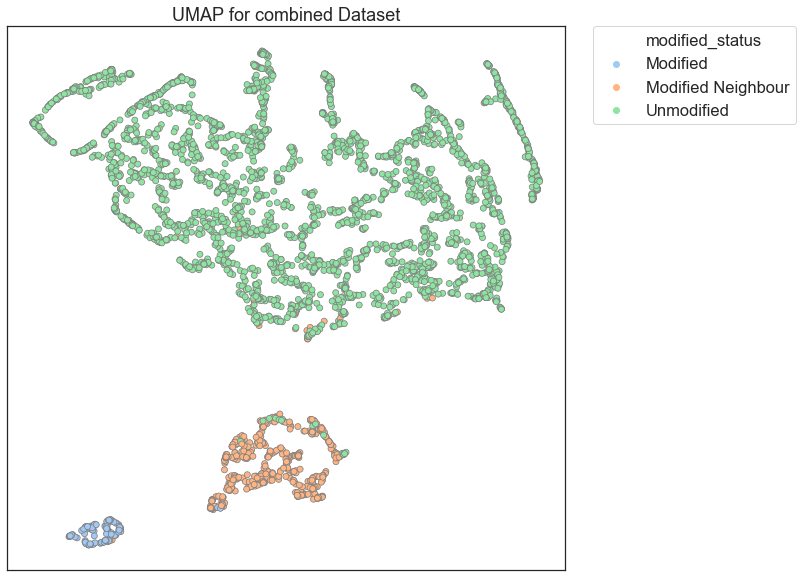

In [14]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="umap_dim_2", y="umap_dim_1", data = umap_df, hue="modified_status", edgecolor="grey")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True)
plt.title("UMAP for combined Dataset")
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.yticks([]);

# TSNE

In [15]:
from sklearn.manifold import TSNE

In [16]:
tsne = TSNE(random_state=7, perplexity = 50)
tsne_combined = tsne.fit_transform(preprocessor_combined_limited.fit_transform(df_combined))
df_combined_w_tsne = pd.concat([df_combined.modified,pd.Series(tsne_combined[:,0]).rename("tsne_d1"),
                  pd.Series(tsne_combined[:,1]).rename("tsne_d2")],axis=1, )

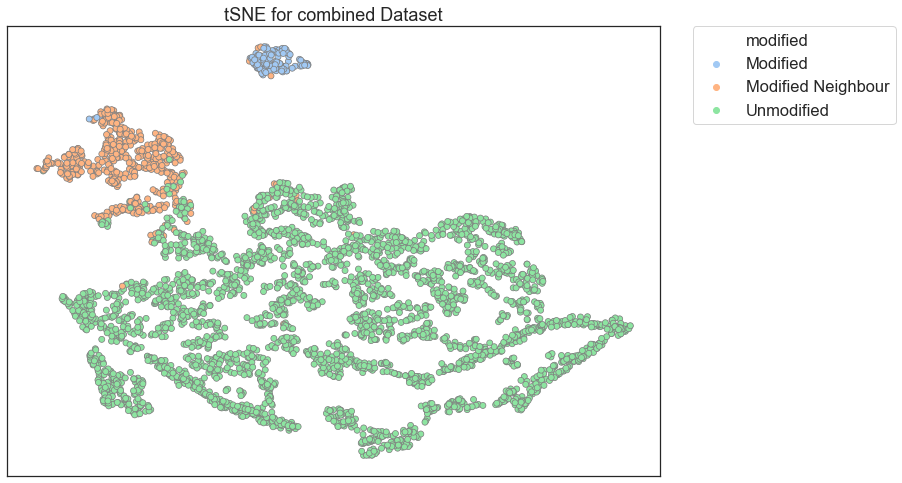

In [17]:
sns.scatterplot(data = df_combined_w_tsne, x = "tsne_d1", y = "tsne_d2", hue = "modified", edgecolor="grey")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True)
plt.title("tSNE for combined Dataset")
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.yticks([]);
    

# dwell time rolling min to dwell time median

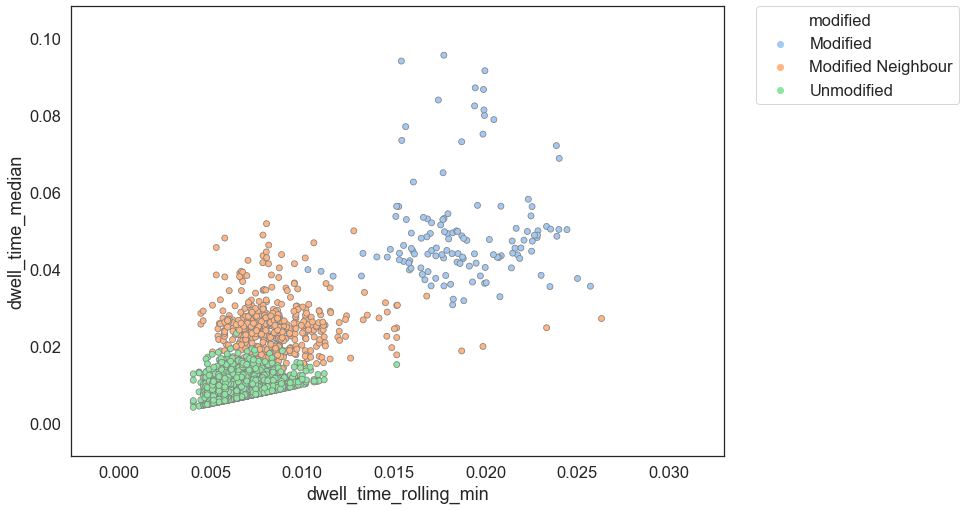

In [31]:
sns.scatterplot(data=df_combined, x="dwell_time_rolling_min", y="dwell_time_median", hue="modified", edgecolor="grey")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True);

# dwell time according to mod status

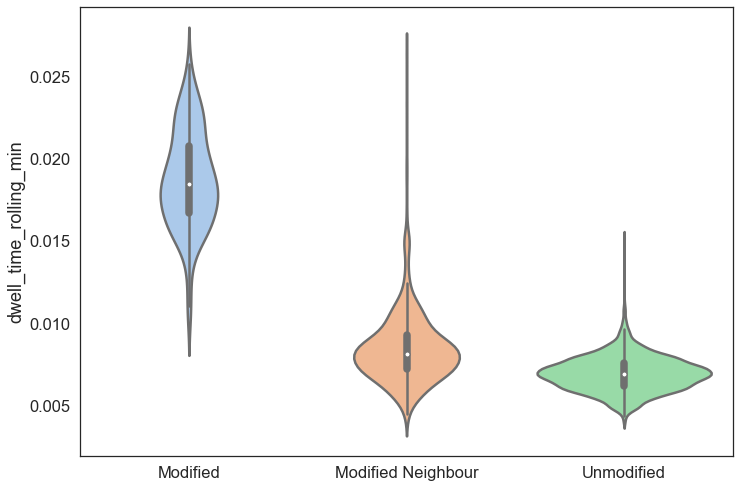

In [19]:
sns.violinplot(data=df_combined, y="dwell_time_rolling_min", x="modified")
plt.xlabel("");

# yeast data

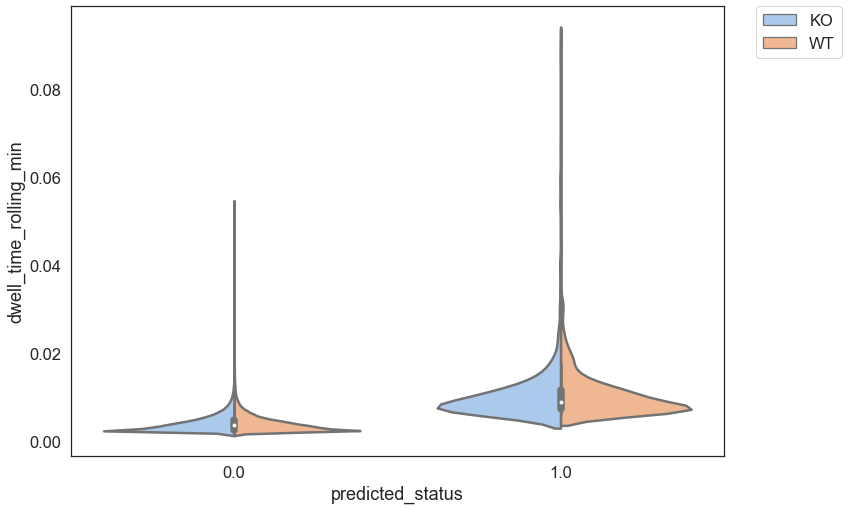

In [37]:
sns.violinplot(data=df_yeast_combined_predicted, x="predicted_status", y="dwell_time_rolling_min", hue="file_type", split=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True);

## umap

In [61]:
df_yeast_combined_predicted

,file_name,ref_number,ref_pos,ref_kmer,read_num,dwell_time_median,dwell_time_min,dwell_time_max,median_value_median,median_value_min,median_value_max,base_1,base_2,base_3,base_4,base_5,file_type,dwell_time_rolling_median,median_value_rolling_median,dwell_time_rolling_min,median_value_rolling_min,dwell_time_diff_to_median,median_value_diff_to_median,predicted_status
0,KO_1_eventalign_collapsed.tsv,YJR094W-A,144,AGAGG,#1,0.01428,0.01428,0.01428,124.223000,124.223000,124.223000,A,G,A,G,G,KO,0.011950,113.546997,0.00332,104.707001,0.005815,27.098598,0.0
1,KO_1_eventalign_collapsed.tsv,YJR094W-A,145,GAGGT,#1,0.01195,0.01195,0.01195,104.707001,104.707001,104.707001,G,A,G,G,T,KO,0.010620,111.370998,0.00332,104.707001,0.003485,7.582600,0.0
2,KO_1_eventalign_collapsed.tsv,YJR094W-A,146,AGGTG,#1,0.00332,0.00332,0.00332,113.546997,113.546997,113.546997,A,G,G,T,G,KO,0.011950,109.195000,0.00332,87.026100,-0.005145,16.422596,0.0
3,KO_1_eventalign_collapsed.tsv,YJR094W-A,147,GGTGC,#1,0.00929,0.00929,0.00929,109.195000,109.195000,109.195000,G,G,T,G,C,KO,0.009290,107.495003,0.00332,87.026100,0.000825,12.070599,0.0
4,KO_1_eventalign_collapsed.tsv,YJR094W-A,148,GTGCA,#1,0.01859,0.01859,0.01859,87.026100,87.026100,87.026100,G,T,G,C,A,KO,0.009290,107.495003,0.00332,87.026100,0.010125,-10.098301,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572198,WT_2_eventalign_collapsed.tsv,YAL005C,1920,GTTGA,#170,0.01627,0.01627,0.01627,90.990997,90.990997,90.990997,G,T,T,G,A,WT,0.004650,115.274002,0.00299,90.990997,0.007310,-2.706200,0.0
572199,WT_2_eventalign_collapsed.tsv,YAL005C,1921,TTGAT,#170,0.00299,0.00299,0.00299,115.274002,115.274002,115.274002,T,T,G,A,T,WT,0.008300,115.274002,0.00299,90.990997,-0.005970,21.576805,0.0
572200,WT_2_eventalign_collapsed.tsv,YAL005C,1922,TGATT,#170,0.00830,0.00830,0.00830,117.613998,117.613998,117.613998,T,G,A,T,T,WT,0.008300,108.106003,0.00299,90.990997,-0.000660,23.916801,0.0
572201,WT_2_eventalign_collapsed.tsv,YAL005C,1923,GATTA,#170,0.06309,0.06309,0.06309,91.868652,91.868652,91.868652,G,A,T,T,A,WT,0.007305,111.690002,0.00299,91.868652,0.054130,-1.828545,0.0


In [ ]:
embedding = umap.fit_transform(preprocessor_combined_limited.fit_transform(df_yeast_combined_predicted))

umap_yeast_df = pd.DataFrame(embedding)
umap_yeast_df["modified"] = df_combined_yeast_predicted.predicted_status.astype("category")
umap_yeast_df.columns = ["umap_dim_1","umap_dim_2","modified_status"]

In [52]:
# interactive plot for numeric features to see if base identity is correlated to values

@interact(base = ["base_1","base_2","base_3","base_4","base_5"], 
          y_axis = list(df_not_combined.columns[df_not_combined.dtypes ==  "float"]))
def test_plot(base, y_axis):
    sns.boxplot(data = df_not_combined, y = y_axis,x="modified_status", hue=base, hue_order=["A","G","C","T"])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True);

interactive(children=(Dropdown(description='base', options=('base_1', 'base_2', 'base_3', 'base_4', 'base_5'),…